Start loading raw data.
Finish loading raw data.
Start filtering low-quality cells and SNPs.


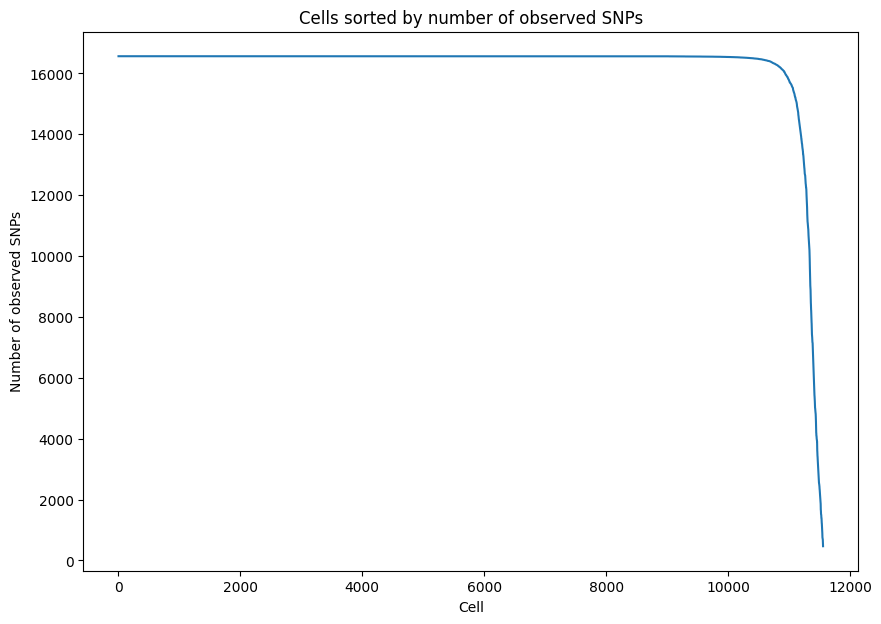

Please determine y-axis threshold in the plot to filter low-quality cells with low number of observed SNPs.   16000


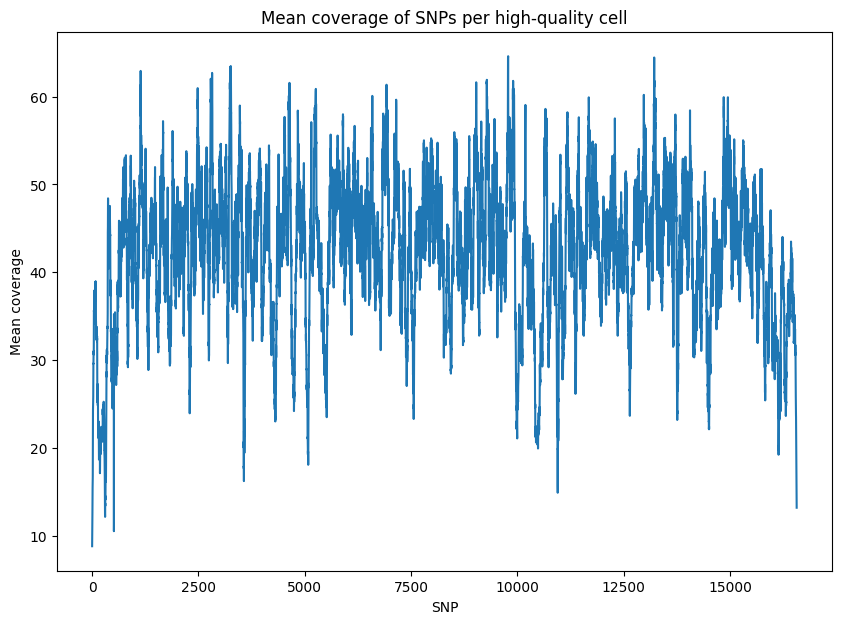

Please determine y-axis threshold in the plot to filter low-quality SNPs with low coverage.   0


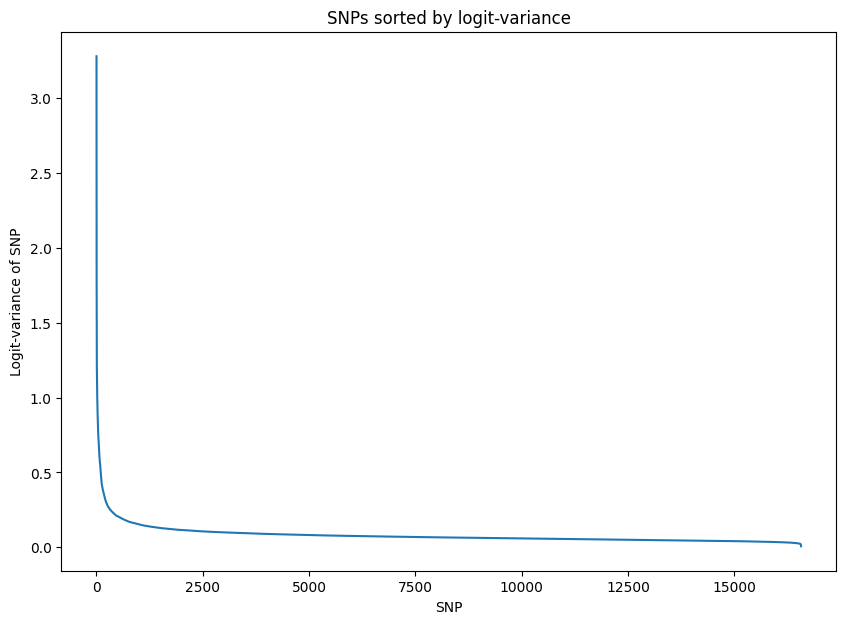

Please determine y-axis threshold in the plot to filter low-quality SNPs with low logit-variance.   0.5
Finish filtering low-quality data, 10936 cells and 100 SNPs will be used for downstream analysis.
Start training VAE.
Epoch[10/2000], Cost: 19.437216
Epoch[20/2000], Cost: 9.243177
Epoch[30/2000], Cost: 5.847388
Epoch[40/2000], Cost: 4.988832
Epoch[50/2000], Cost: 4.743710
Epoch[60/2000], Cost: 4.652846
Epoch[70/2000], Cost: 4.613124
Epoch[80/2000], Cost: 4.589704
Epoch[90/2000], Cost: 4.573836
Epoch[100/2000], Cost: 4.561131
Epoch[200/2000], Cost: 4.500948
Epoch[300/2000], Cost: 4.472861
Epoch[400/2000], Cost: 4.452934
Epoch[500/2000], Cost: 4.435421
Epoch[600/2000], Cost: 4.417882
Epoch[700/2000], Cost: 4.400035
Epoch[800/2000], Cost: 4.382056
Epoch[900/2000], Cost: 4.363924
Epoch[1000/2000], Cost: 4.345860
Epoch[1100/2000], Cost: 4.327429
Epoch[1200/2000], Cost: 4.308482
Epoch[1300/2000], Cost: 4.289510
Epoch[1400/2000], Cost: 4.270442
Epoch[1500/2000], Cost: 4.251700
Epoch[1600/2

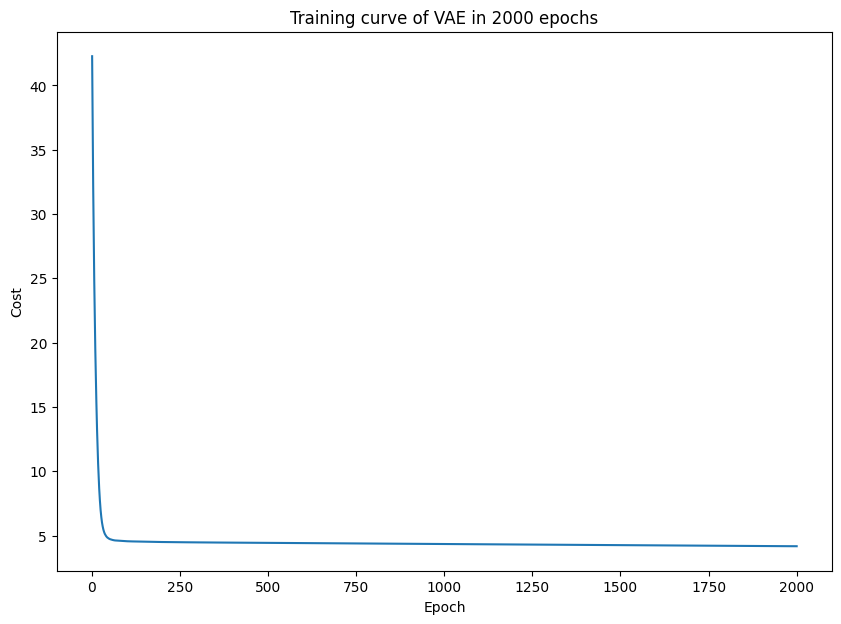

Start learning PCA and UMAP of latent space in VAE.
Finish learning, PCA and UMAP of latent space will be shown below.


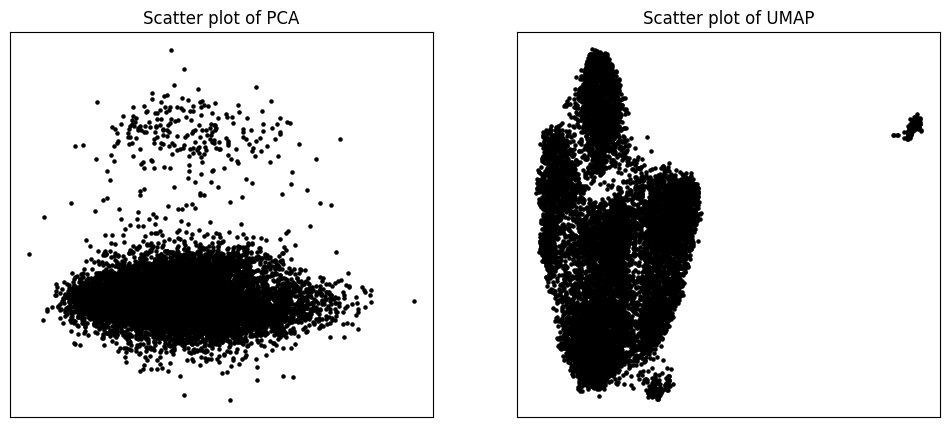

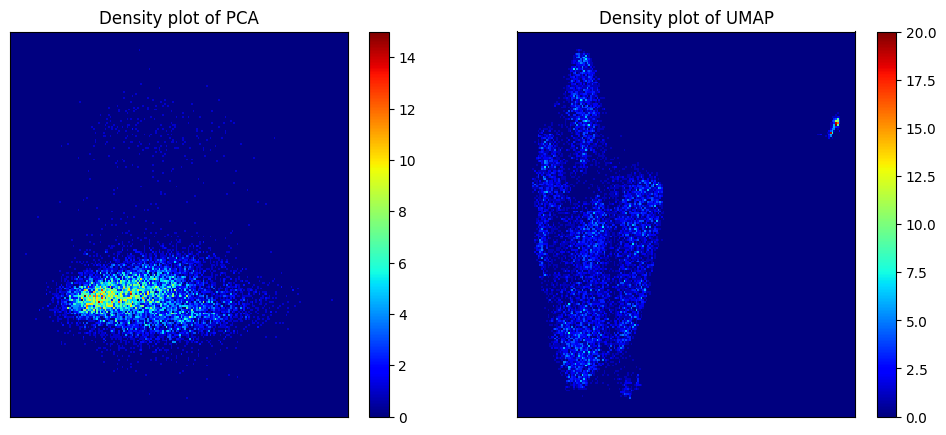

Start clustering.
Finish clustering.
PCA and UMAP of individual clusters will be shown below.


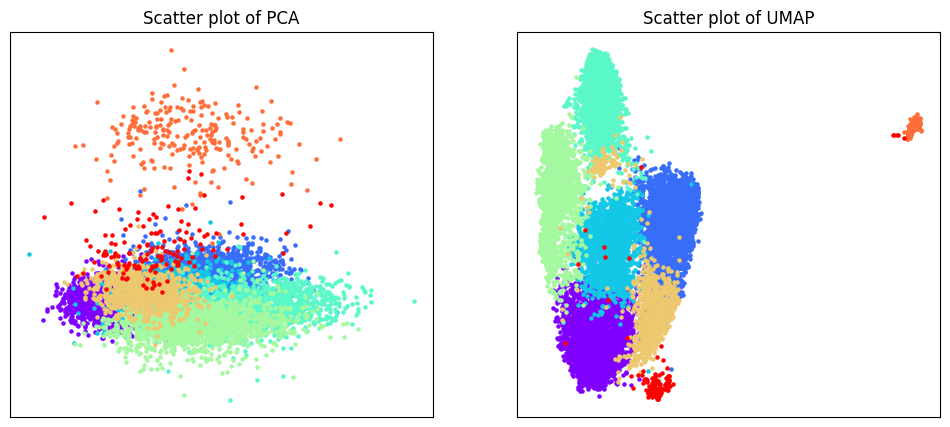

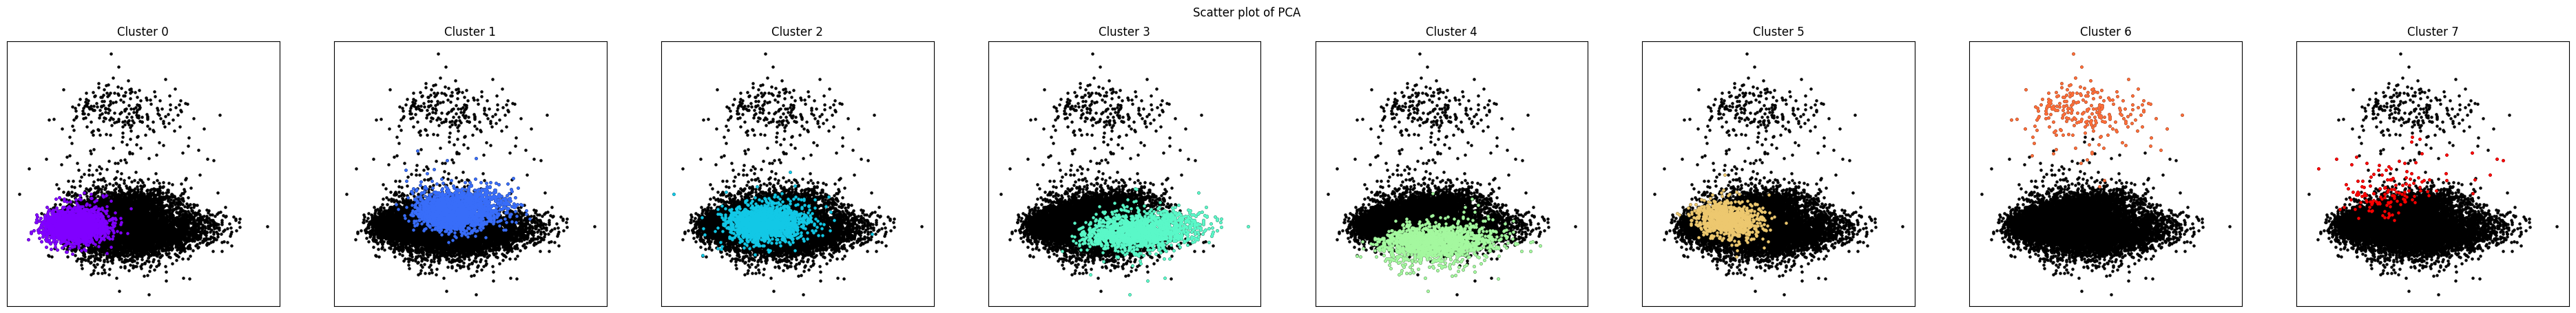

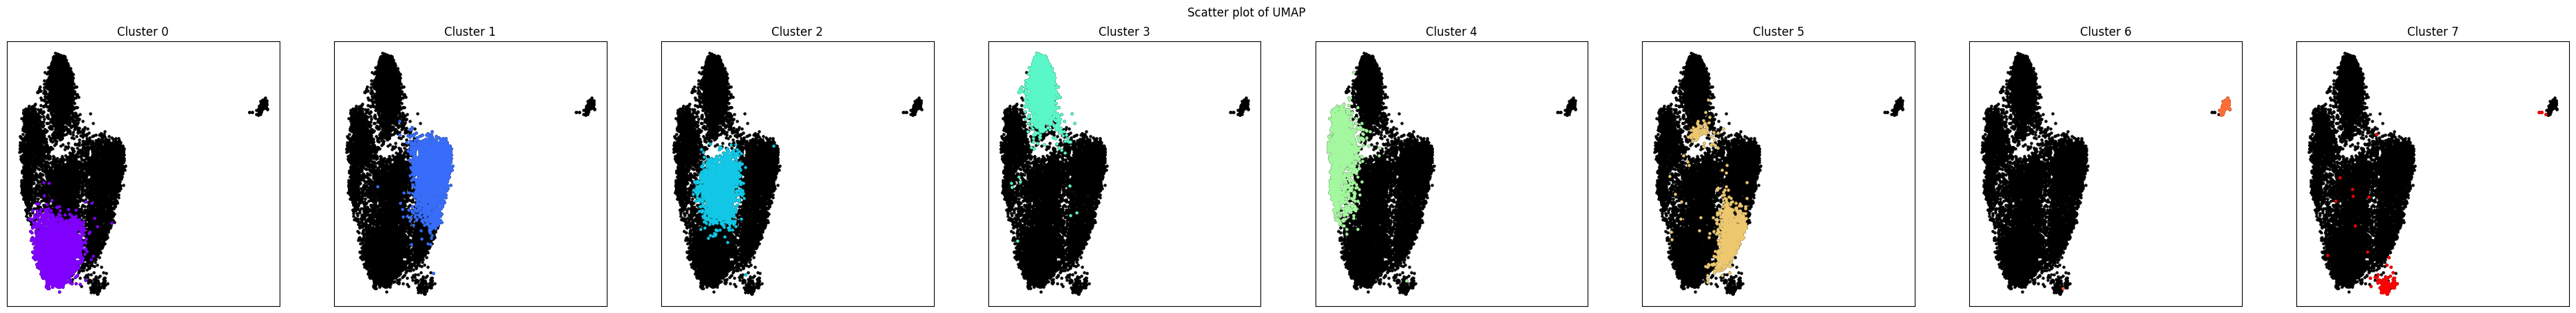

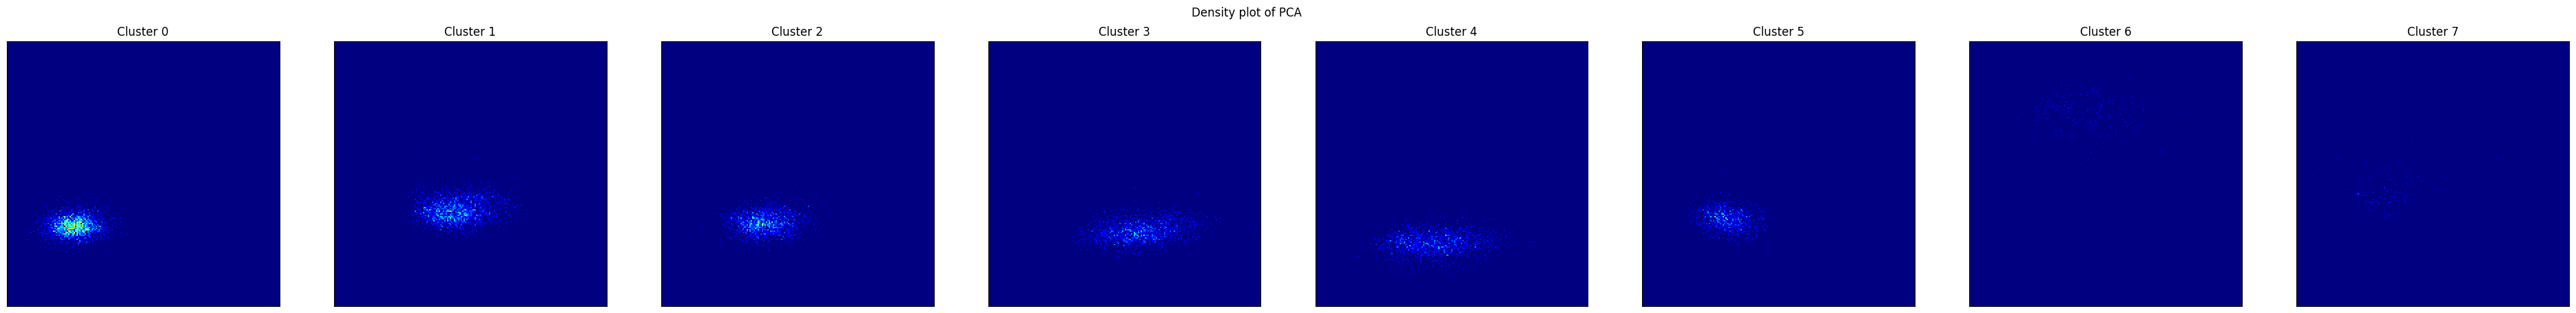

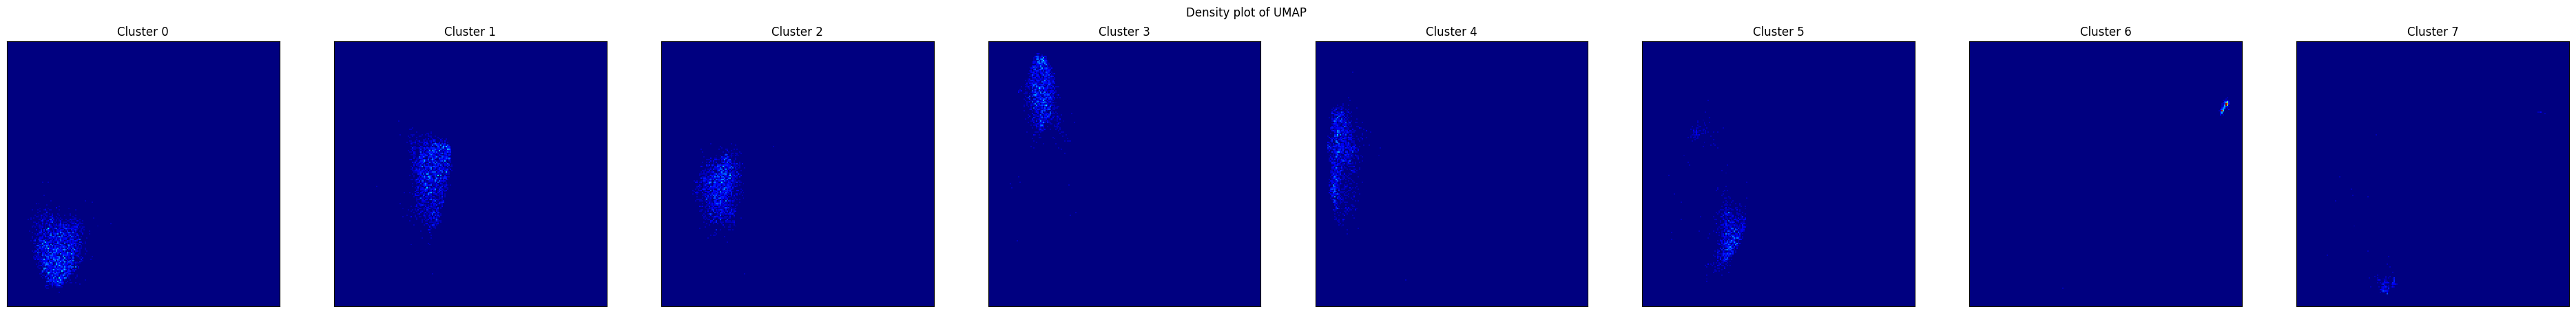

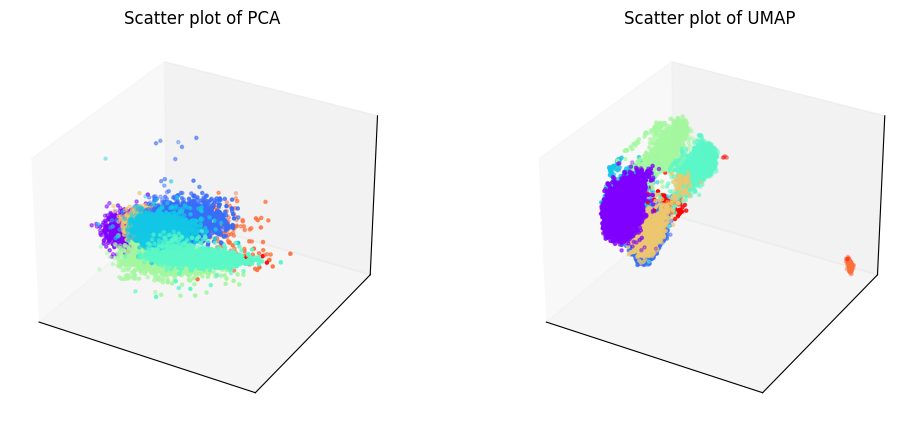

Phylogenetic tree in latent space will be shown below.


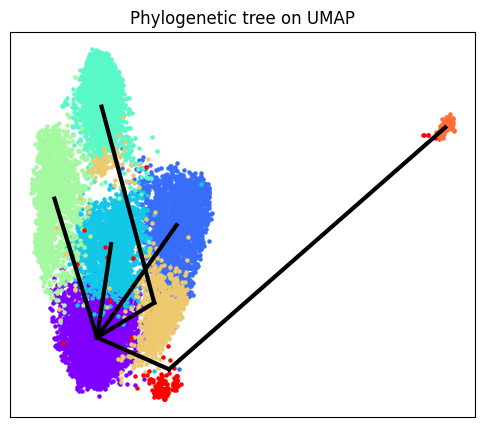

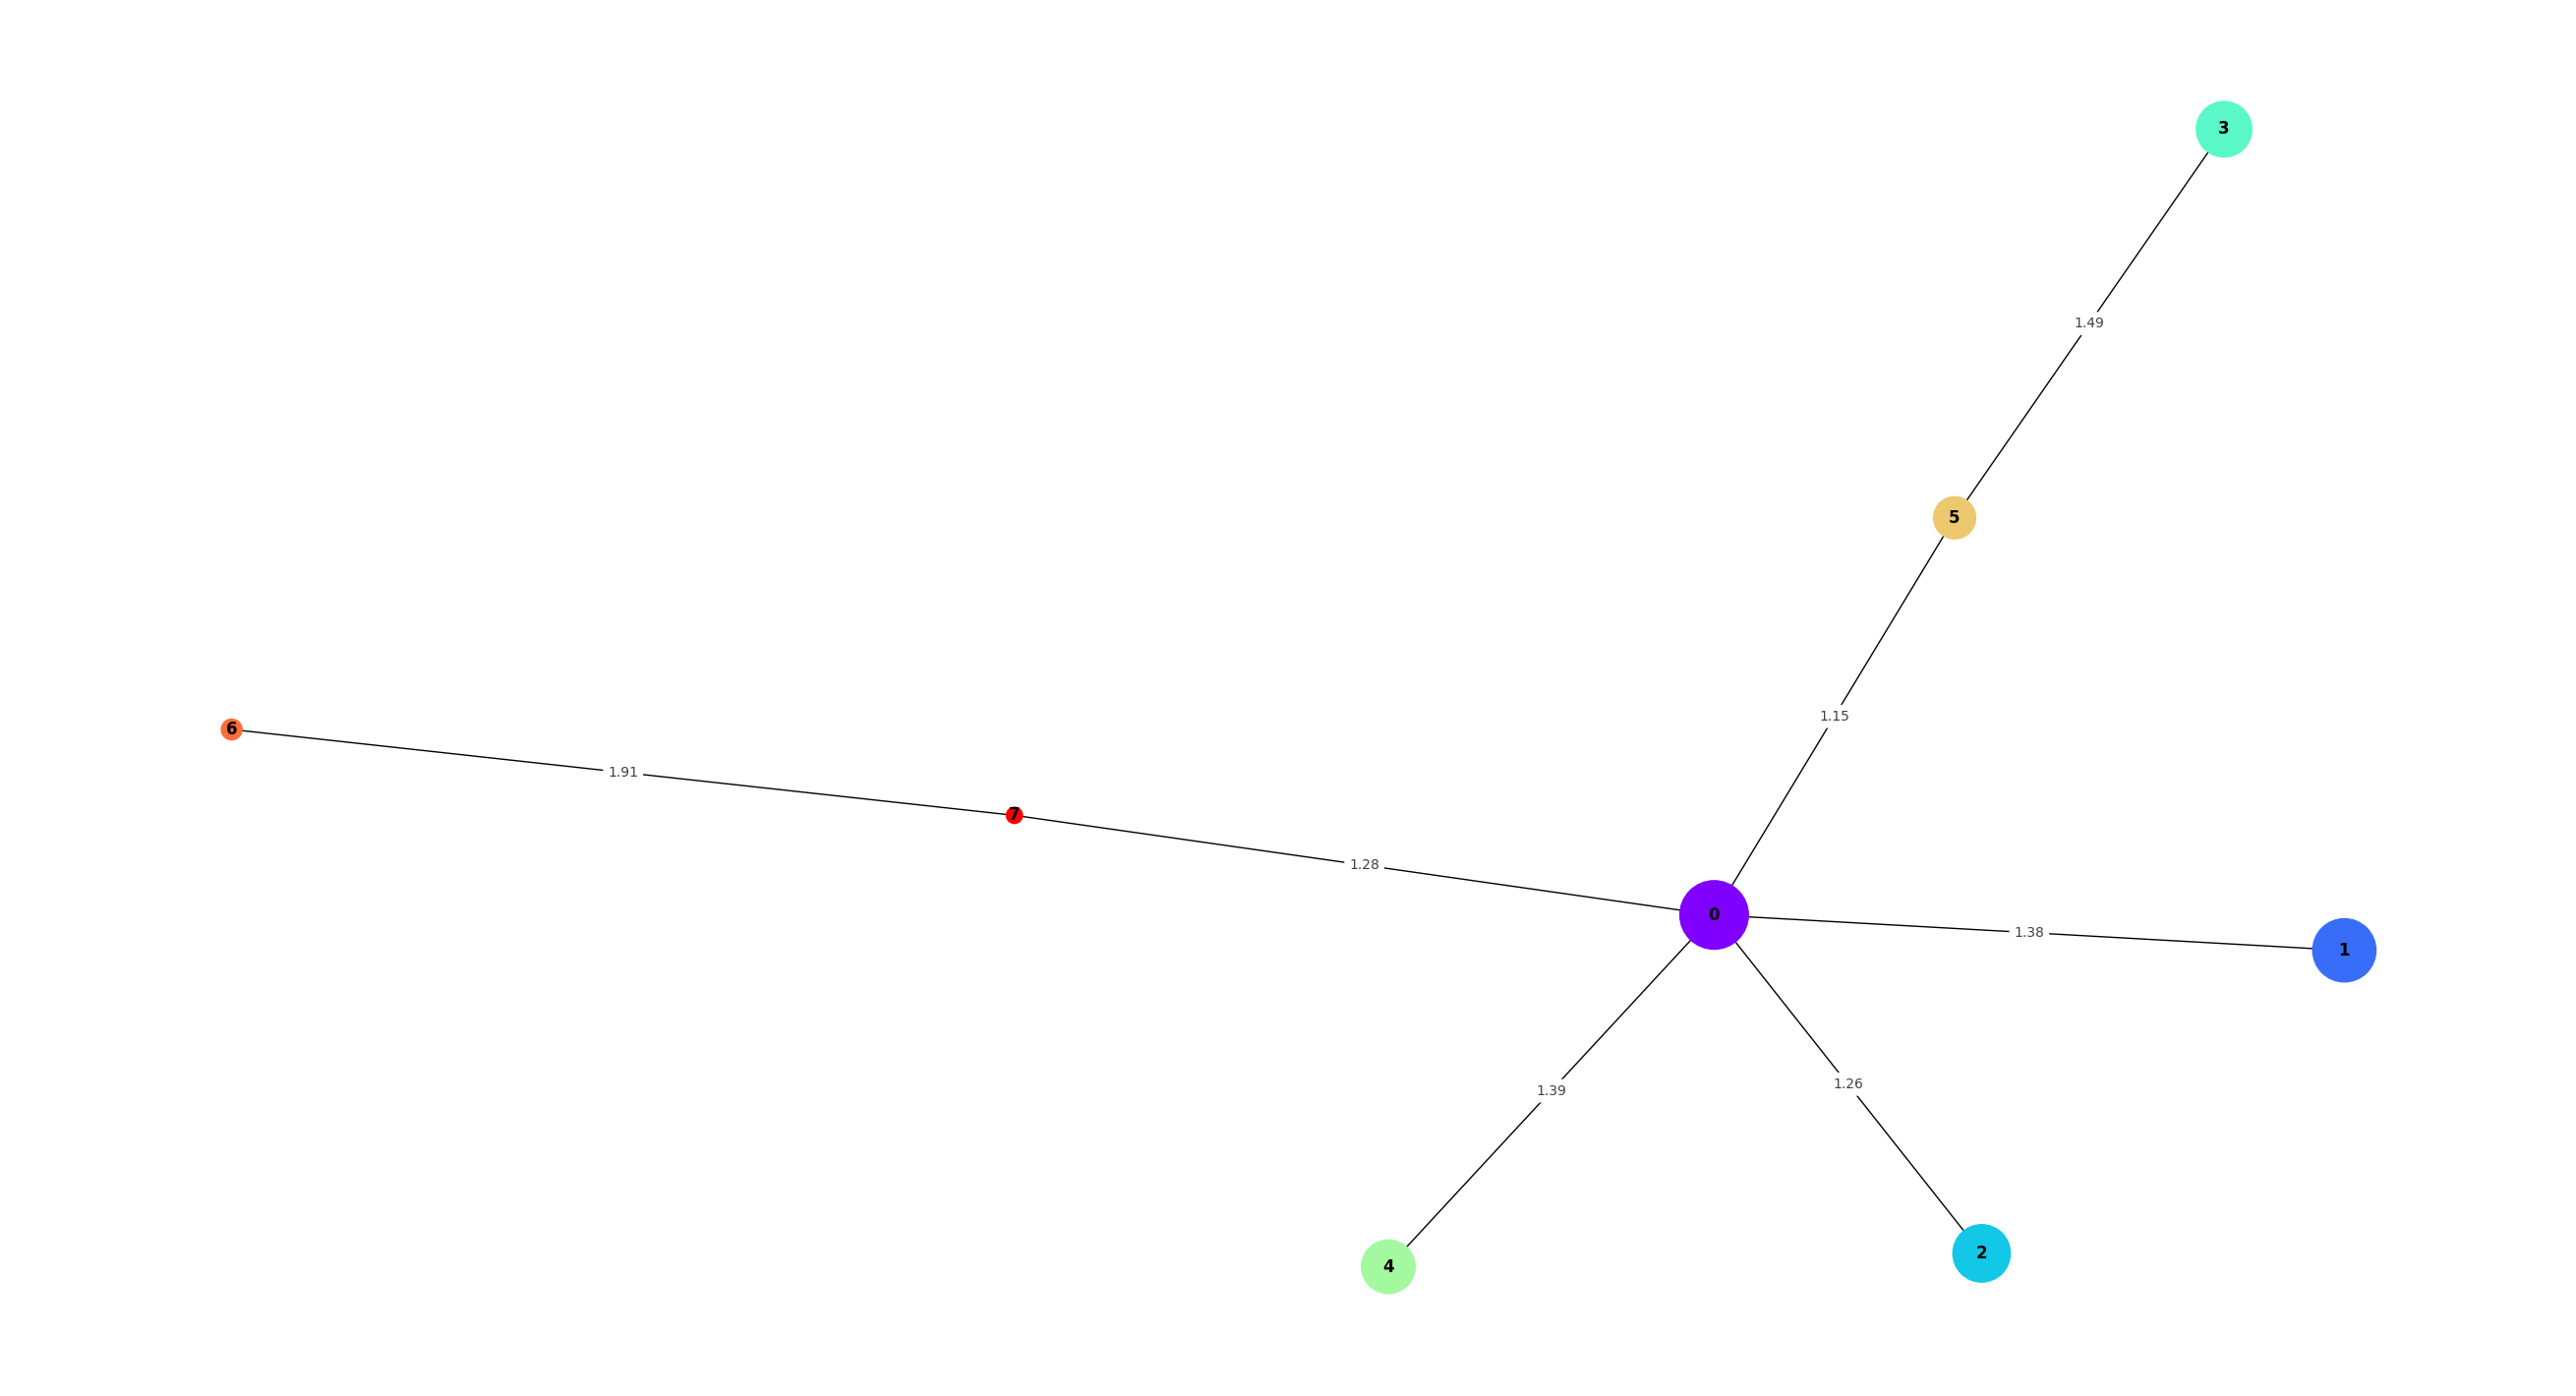

SNP-allelic ratios of 10936 cells and 50 SNPs will be shown below.


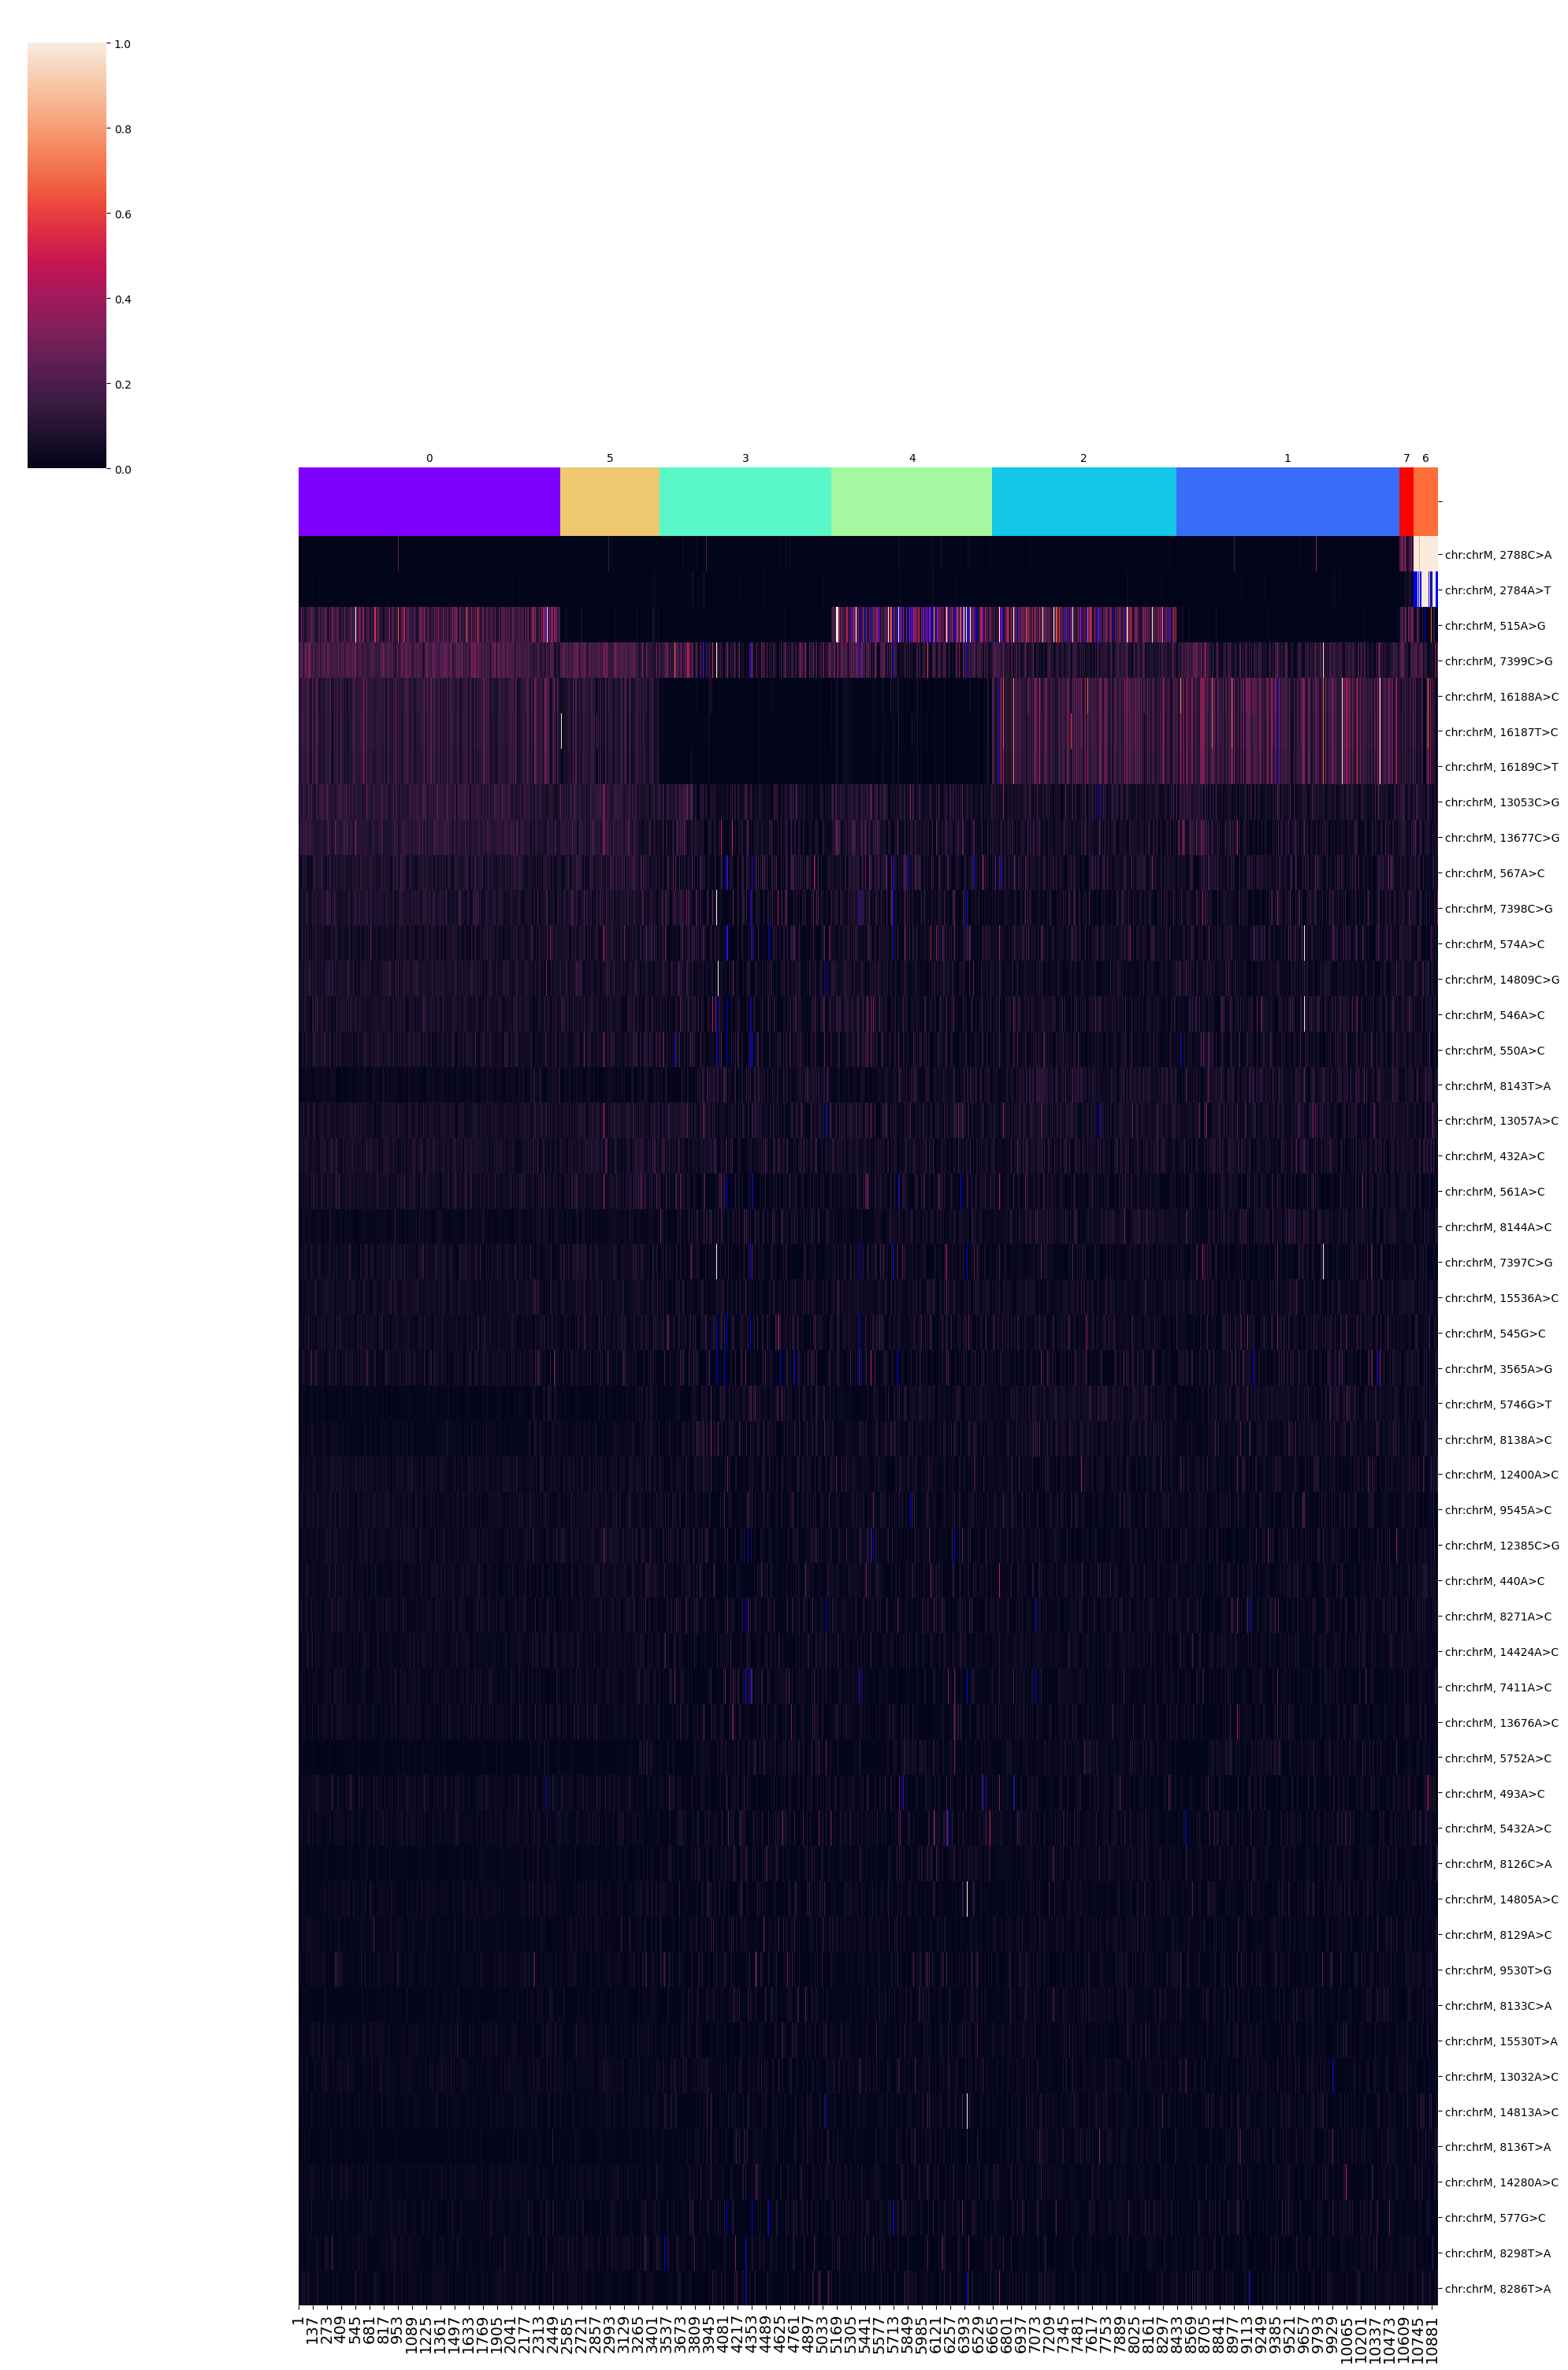

SNPs sorted by lowest p-value will be shown below


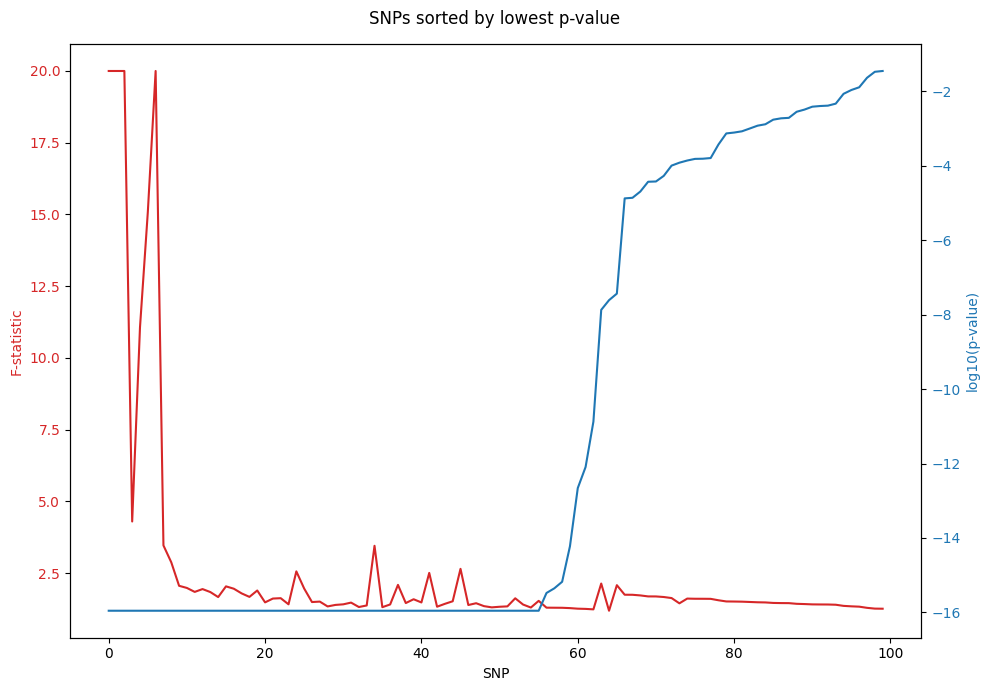

In [2]:
import torch
torch.set_default_device('cuda')
torch.cuda.set_device('cuda:3')

%run /home/kevin/storage_kevin/past_figures/figures_final7/notebook/SNPmanifold.ipynb
test1 = SNP_VAE(path = "/home/kevin/storage_kevin/.past_datasets/combined_MAESTER/CD34_PBMC")
test1.filtering()
test1.training()
test1.clustering(algorithm = "leiden_full")
test1.phylogeny()

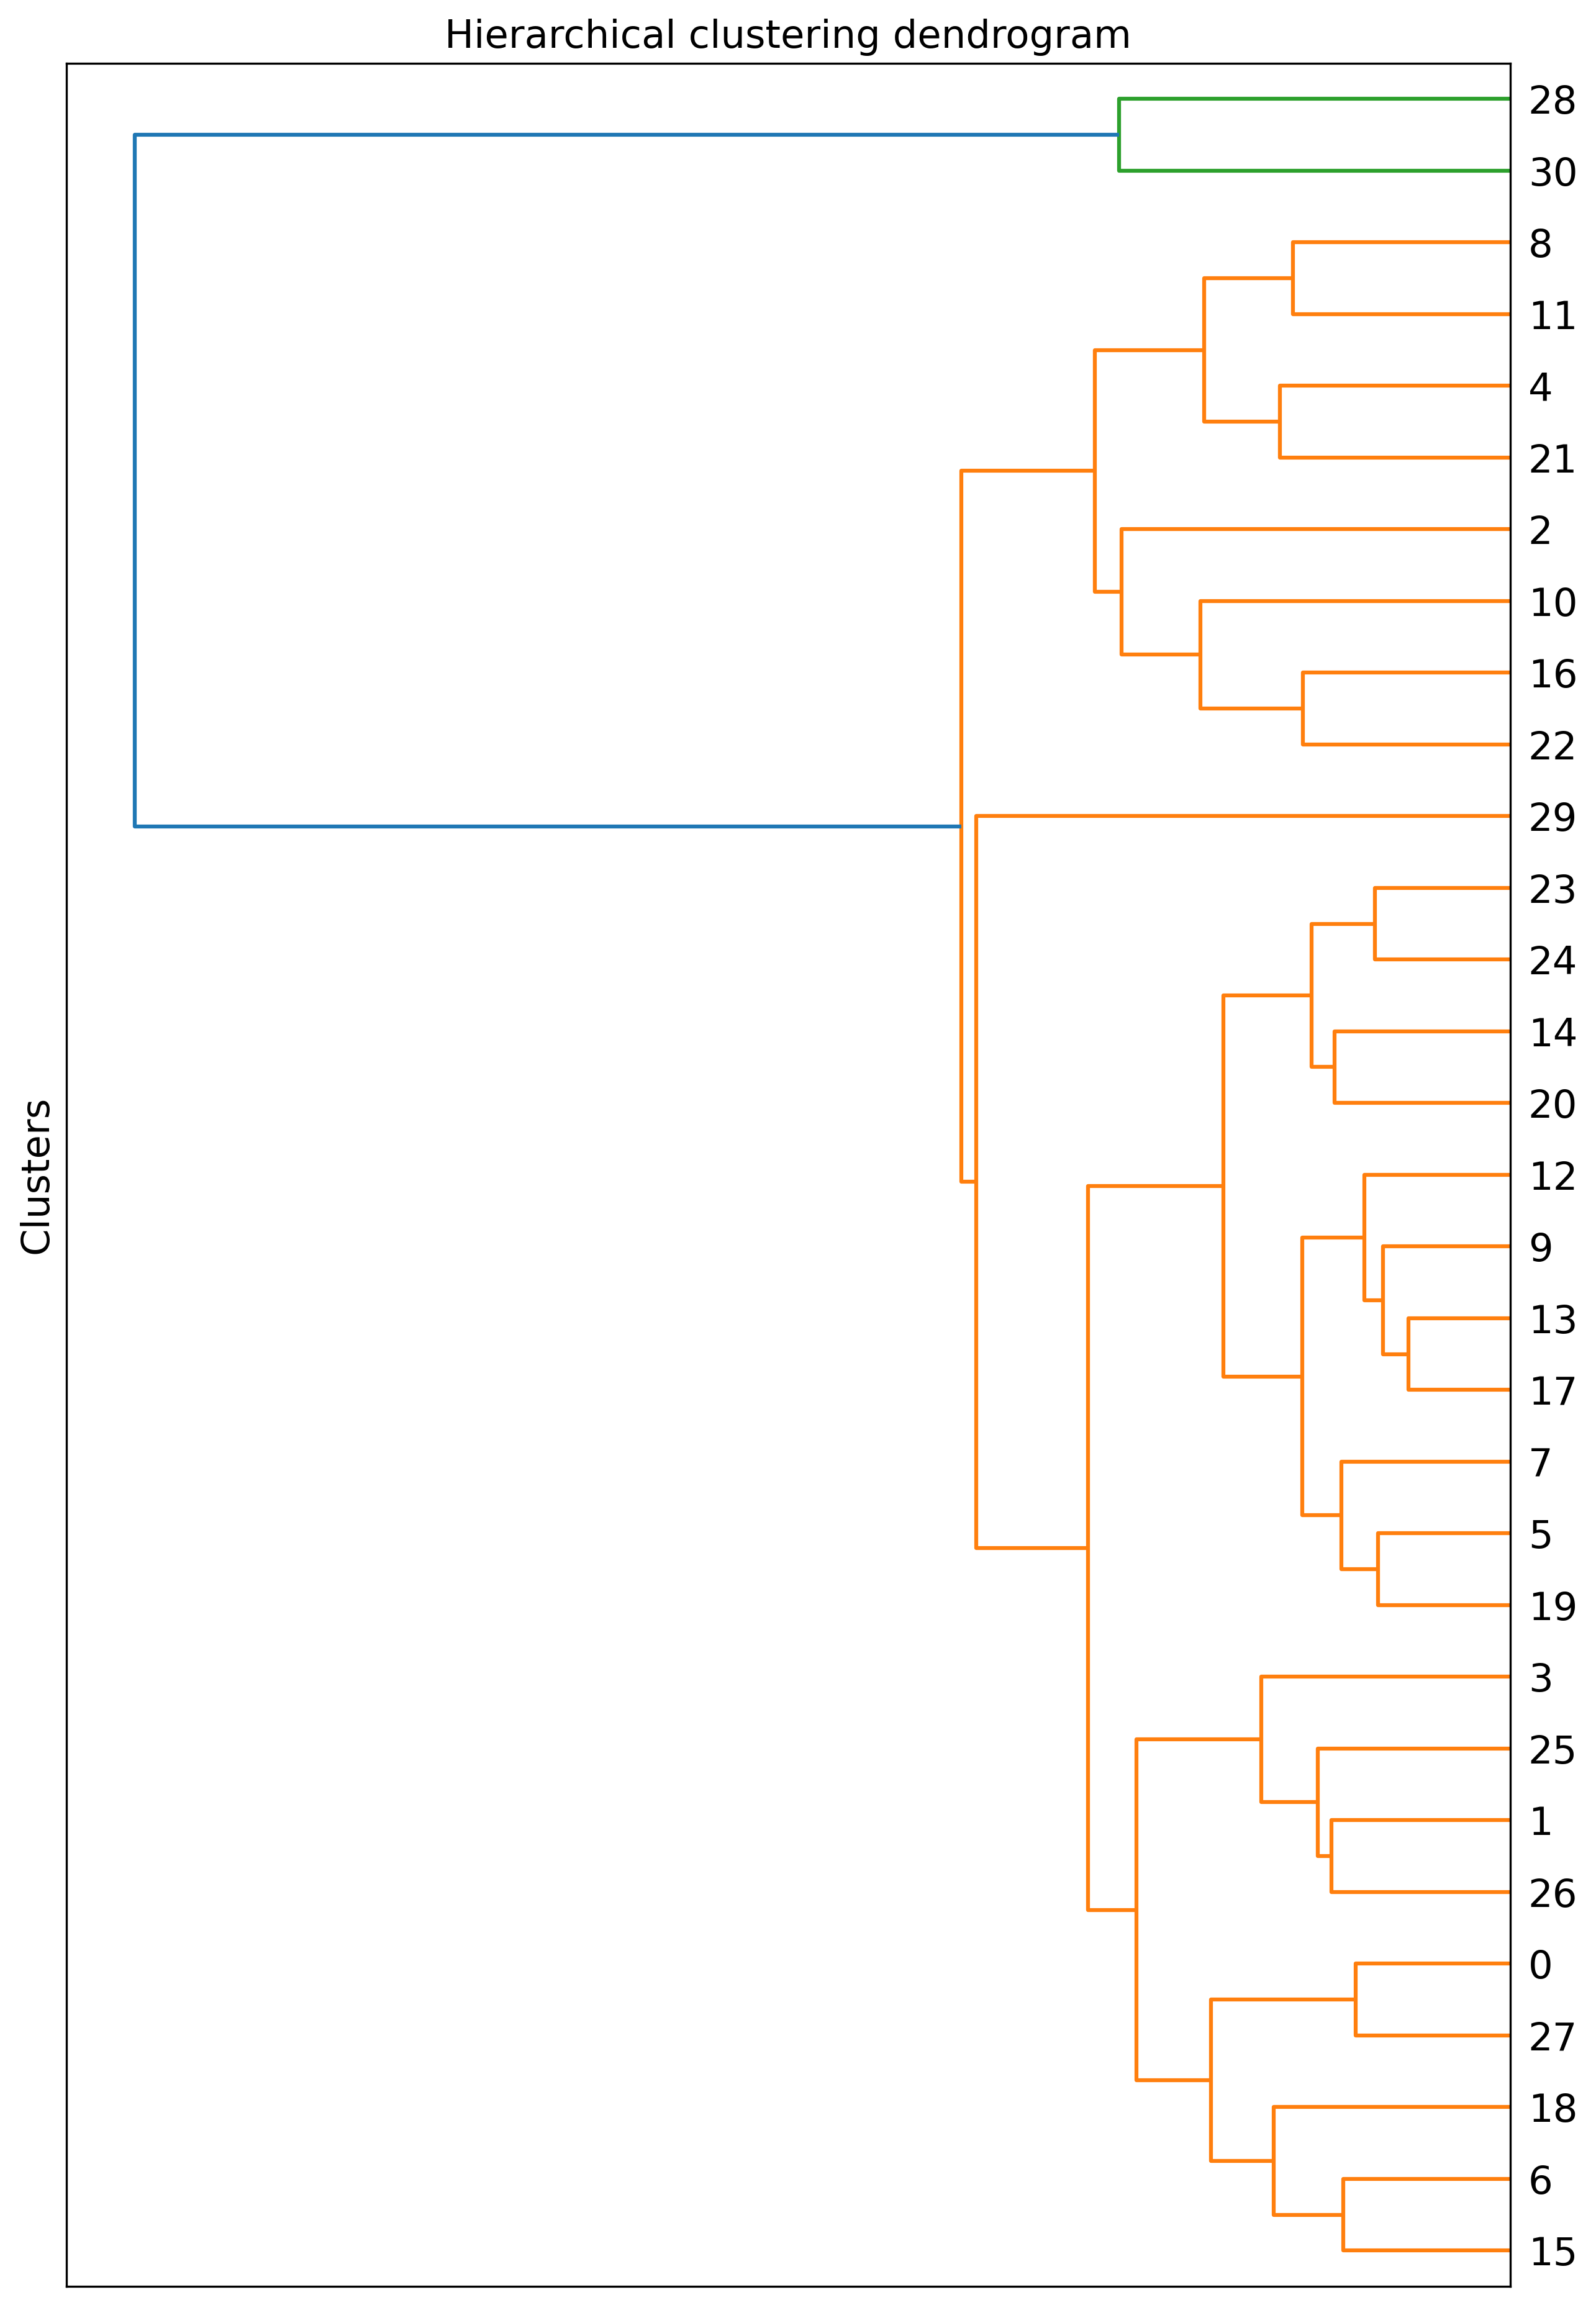

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

assinged_label = np.genfromtxt("assigned_label_umap3d.csv", delimiter=",").astype(int)

clusters = []

for w in range(np.max(assinged_label) + 1):
    
    clusters.append(np.where(assinged_label == w)[0])

centre_embedding_full = np.empty((np.max(assinged_label) + 1, test1.latent.shape[1]))
    
for w in range(np.max(assinged_label) + 1):
    
    centre_embedding_full[w, :] = np.mean(test1.latent[clusters[w], :], 0)

from scipy.cluster.hierarchy import linkage, dendrogram

bifur_tree = linkage(centre_embedding_full, method='average')

fig, axs = plt.subplots(1, 1, figsize=(10, ((np.max(assinged_label) + 1) * 0.5)))
fig.set_dpi(300)

dendrogram(bifur_tree, orientation='left', labels=np.arange((np.max(assinged_label) + 1).astype(int)).astype(int), distance_sort='descending', show_leaf_counts=True, leaf_font_size = 15)

axs.set_title('Hierarchical clustering dendrogram', fontsize = 15)
axs.set_xticks([])
axs.set_ylabel('Clusters', fontsize = 15)
plt.show()